# Resto1 Imagen y Filtrado

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Carga de imagenes

In [2]:
ruta = r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica3_(Parcial)\Parte_2\Parte_1AverageGT.tiff'
imagen = cv.imread(ruta, cv.IMREAD_GRAYSCALE)

print('El tamaño de la imagen es',imagen.shape,'pixeles')


El tamaño de la imagen es (11363, 25202) pixeles


# Mostramos la imagen Ground Truth


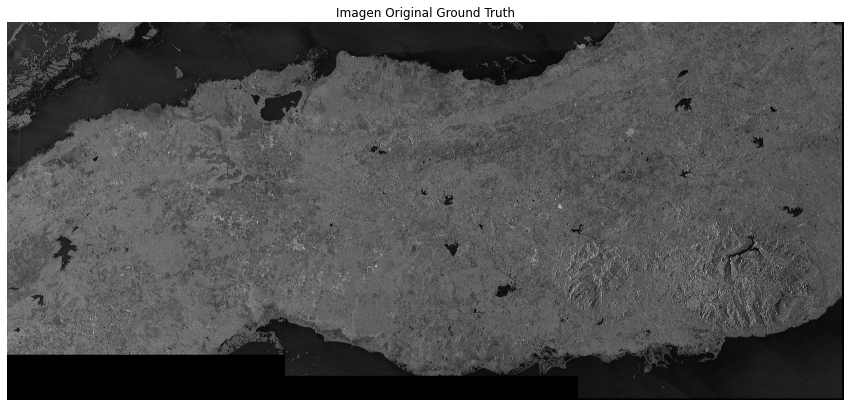

In [3]:
plt.figure(figsize=(15, 15))
plt.imshow(imagen, cmap='gray')
plt.axis('off')
plt.title('Imagen Original Ground Truth')
plt.show()

# Mostramos una parte aumentada de la imagen Ground Truth para ver el ruido speckle.

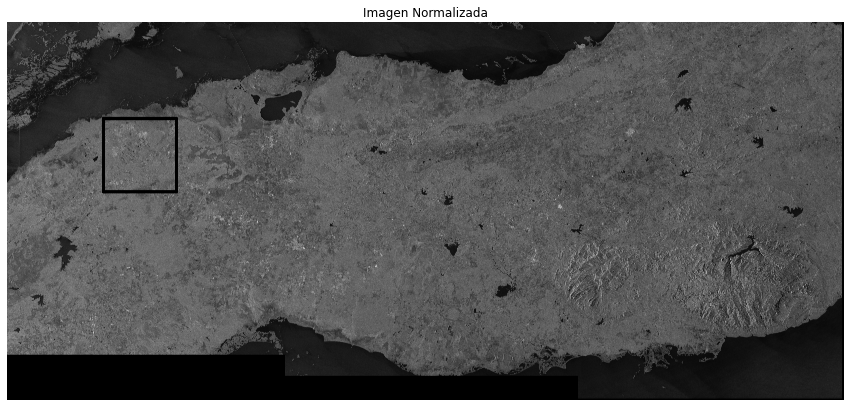

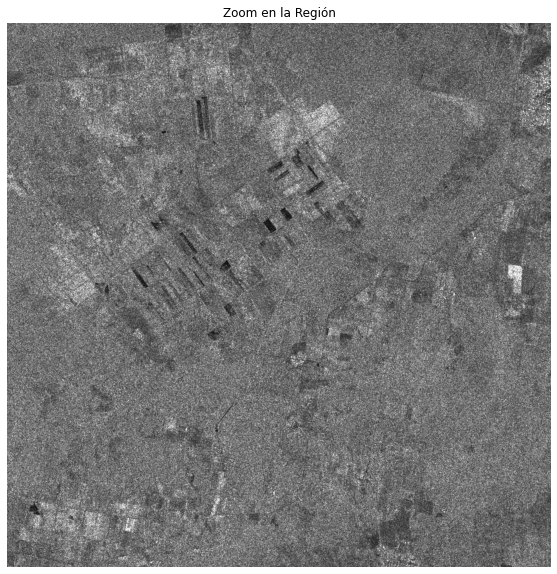

In [4]:
# Definir coordenadas del rectángulo (x1, y1, x2, y2)
x1, y1 = 3000, 3000
x2, y2 = 5000, 5000

imagen_copy1 = imagen.copy()
# Dibujar el rectángulo verde (bordes delgados)
cv.rectangle(imagen_copy1, (x1-100, y1-100), (x2+100, y2+100), (0, 255, 0), 100)  # Color verde y grosor 1

# Mostrar la imagen con el rectángulo
plt.figure(figsize=(15, 15))
plt.imshow(imagen_copy1, cmap='gray')
plt.axis('off')
plt.title('Imagen Normalizada')

# Crear una sección de zoom de la región especificada
zoom = imagen[y1:y2, x1:x2]

# Mostrar la sección ampliada
plt.figure(figsize=(10, 10))
plt.imshow(zoom, cmap='gray')
plt.axis('off')
plt.title('Zoom en la Región')

# Mostrar todas las figuras
plt.show()

# Aplicamos filtro fastNlMeansDenoising

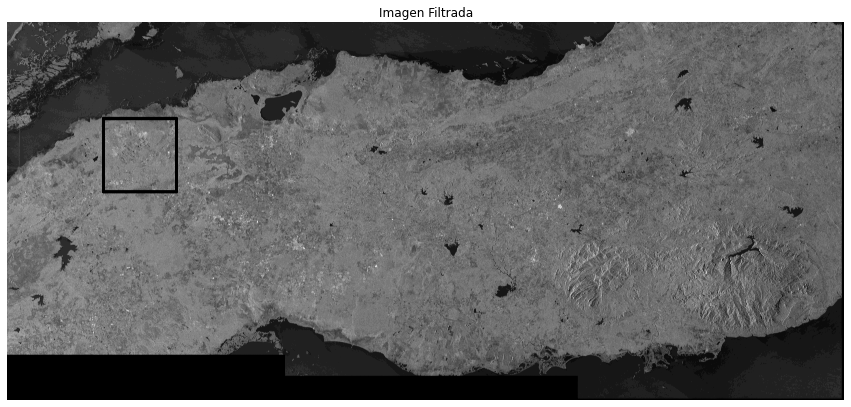

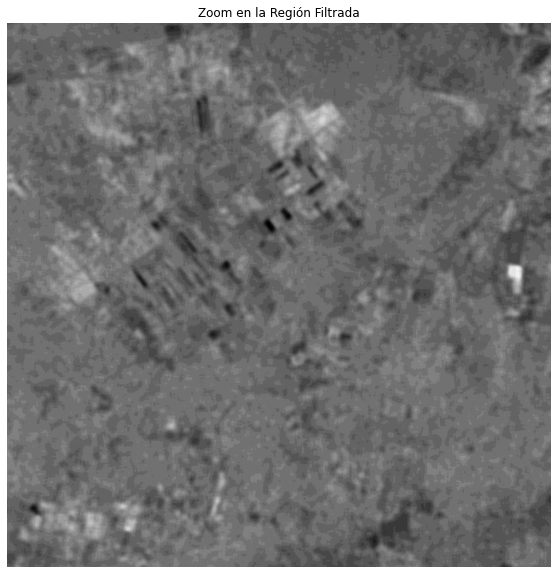

In [5]:
# Aplicar el filtro de denoising a la imagen
imagen_filtrada = cv.fastNlMeansDenoising(imagen, None, 15, 7, 21)

# Definir coordenadas del rectángulo (x1, y1, x2, y2)
x1, y1 = 3000, 3000
x2, y2 = 5000, 5000

# Crear una copia de la imagen filtrada para dibujar el rectángulo
imagen_filrada_copy1 = imagen_filtrada.copy()

# Dibujar el rectángulo verde (bordes delgados)
cv.rectangle(imagen_filrada_copy1, (x1-100, y1-100), (x2+100, y2+100), (0, 255, 0), 100)  # Color verde y grosor 1

# Mostrar la imagen filtrada con el rectángulo
plt.figure(figsize=(15, 15))
plt.imshow(imagen_filrada_copy1, cmap='gray')
plt.axis('off')
plt.title('Imagen Filtrada')

# Crear una sección de zoom de la región especificada
zoom = imagen_filtrada[y1:y2, x1:x2]

# Mostrar la sección ampliada
plt.figure(figsize=(10, 10))
plt.imshow(zoom, cmap='gray')
plt.axis('off')
plt.title('Zoom en la Región Filtrada')

# Mostrar todas las figuras
plt.show()

# Guardamos la imagen filtrada

In [6]:
cv.imwrite('imagen_filtrada.tiff', imagen_filtrada)


True

## Resumen de la Etapa 1: Escalado de Imágenes

### Descripción General
Este programa se encarga de cargar una imagen de radar en formato TIFF, normalizar sus valores de píxeles y escalarla para una mejor visualización. Al final, se guarda la imagen escalada con un nuevo nombre.

### Librerías Utilizadas
- **OpenCV (`cv2`)**: Se utiliza para cargar y guardar la imagen, así como para realizar operaciones de procesamiento de imágenes.
- **NumPy (`np`)**: Se utiliza para manipular y realizar cálculos con arreglos de datos.

### Pasos Realizados en el Programa

1. **Cargar la Imagen**:
   - Se carga la imagen desde una ruta específica en formato TIFF utilizando `cv2.imread()`.

2. **Imprimir Información de la Imagen** (opcional):
   - Se imprimen características de la imagen, como su forma, tipo de dato y valores de píxel máximos, medios y mínimos.

3. **Conversión de Tipo de Dato**:
   - Se convierte la imagen a un tipo de dato de punto flotante (`np.single`) para facilitar la normalización.

4. **Normalización y Escalado**:
   - Se calcula una escala de visualización multiplicando la media de la imagen por 3.
   - Se reasignan valores de píxeles que son mayores o iguales a esta escala a la propia escala, y se establecen a cero aquellos que son menores que el mínimo valor de píxel.
   - Se normalizan los valores de píxeles a un rango de 0 a 255.

5. **Guardar la Imagen Escalada**:
   - Se guarda la imagen escalada en la misma carpeta con un nuevo nombre que incluye la cadena `_scaled.tiff` utilizando `cv2.imwrite()`.


## Resumen de la Etapa 1: Alineación y Registro de Imágenes

### Descripción General
Este programa se encarga de alinear una imagen de entrada con una imagen de referencia utilizando técnicas de detección de características y homografía. Al final, se calcula y muestra el error cuadrático medio (MSE) antes y después de la alineación.

### Librerías Utilizadas
- **NumPy (`np`)**: Se utiliza para manipular y realizar cálculos con arreglos de datos.
- **OpenCV (`cv2`)**: Se utiliza para cargar imágenes, realizar operaciones de procesamiento de imágenes, y calcular la homografía.
- **Imutils (`imutils`)**: Se utiliza para realizar operaciones de visualización de imágenes.

### Pasos Realizados en el Programa

1. **Definir Función de Alineación**:
   - Se define la función `align_image()` que toma como entrada una imagen y un template. Utiliza el detector de características ORB para encontrar y emparejar puntos clave entre ambas imágenes.

2. **Cargar Imágenes**:
   - Se cargan tanto la imagen de referencia (template) como la imagen a alinear. Ambas imágenes se convierten a escala de grises.

3. **Redimensionar la Imagen**:
   - Se redimensiona la imagen de entrada para que coincida con la dimensión de la imagen de referencia.

4. **Alinear las Imágenes**:
   - Se llama a la función `align_image()` para alinear la imagen de entrada con la imagen de referencia. El resultado se almacena en la variable `aligned`.

5. **Verificación de Forma**:
   - Se imprime la forma de la imagen antes y después de la alineación.

6. **Guardar la Imagen Alineada**:
   - Se guarda la imagen alineada en la misma carpeta con un nuevo nombre que incluye la cadena `_registered.tiff`.

7. **Calcular el Error Cuadrático Medio (MSE)**:
   - Se define la función `calculate_mse()` que calcula el MSE entre dos imágenes. Se imprime el MSE antes y después de la alineación.


## Resumen de la Etapa 1: Imagen Promedio Ground Truth

Este script utiliza OpenCV y NumPy para cargar un conjunto de imágenes desde un directorio especificado y calcular su promedio. La imagen resultante se guarda en un archivo TIFF. A continuación se detallan las etapas clave del código:

1. **Carga de Bibliotecas**: Se importan las bibliotecas necesarias para el procesamiento de imágenes y manipulación de datos.
2. **Definición de la Ruta Base**: Se especifica el directorio donde se encuentran las imágenes.
3. **Lista de Imágenes**: Se definen las rutas de las imágenes a procesar.
4. **Inicialización de Variables**: Se inicializa una matriz para acumular los valores de píxeles de las imágenes y un escalar para el cálculo del promedio.
5. **Cálculo del Promedio**: Se itera sobre cada imagen, se carga, se convierte a formato de punto flotante, y se acumulan los valores. Finalmente, se divide la suma acumulada por el número de imágenes para obtener el promedio.
6. **Guardado de la Imagen Promedio**: La imagen promedio se convierte a formato entero sin signo y se guarda en el directorio especificado.


# Resumen del Script para Procesamiento de Imágenes

Este script utiliza OpenCV y Matplotlib para cargar, visualizar y procesar una imagen en escala de grises. A continuación se describen las principales etapas del código:

1. **Carga de la Imagen**: Se carga una imagen desde una ruta especificada y se imprime su tamaño en píxeles.
2. **Visualización de la Imagen Original**: Se utiliza Matplotlib para mostrar la imagen original en escala de grises.
3. **Dibujo de un Rectángulo**: Se define una región rectangular en la imagen original, que se dibuja en verde para resaltar una sección específica.
4. **Sección de Zoom**: Se extrae y muestra una sección ampliada de la región especificada.
5. **Filtrado de la Imagen**: Se aplica un filtro de denoising para reducir el ruido en la imagen.
6. **Visualización de la Imagen Filtrada**: Se muestra la imagen filtrada, incluyendo el rectángulo verde sobre la región de interés.
7. **Sección de Zoom Filtrada**: Se muestra una sección ampliada de la imagen filtrada.
8. **Guardado de la Imagen Filtrada**: La imagen filtrada se guarda como un nuevo archivo PNG.



### Dificultades en la Eliminación del Filtro Speckle

El proceso de eliminación del ruido speckle en imágenes SAR presenta varias dificultades, que se pueden resumir de la siguiente manera:

1. **Naturaleza del Ruido**:
   - El ruido speckle es inherentemente un fenómeno multiplicativo que afecta a las imágenes SAR. A diferencia de otros tipos de ruido aditivo, su eliminación requiere técnicas específicas que no alteren los detalles esenciales de la imagen.

2. **Pérdida de Detalles**:
   - Al aplicar filtros de reducción de ruido, como el filtrado de Non-Local Means, existe el riesgo de que se pierdan detalles finos y estructuras importantes en la imagen. Esto puede afectar la interpretación de la información en aplicaciones de teledetección.

3. **Parámetros del Filtro**:
   - La selección de parámetros adecuados para los filtros es crucial. Valores incorrectos pueden llevar a un filtrado insuficiente (dejando ruido) o a un filtrado excesivo (perdiendo detalles). Encontrar un balance óptimo requiere de pruebas y ajustes continuos.

4. **Computacionalmente Intensivo**:
   - Los métodos avanzados de reducción de ruido pueden ser computacionalmente intensivos, lo que puede resultar en tiempos de procesamiento prolongados, especialmente para imágenes de alta resolución.

5. **Artefactos Introducidos**:
   - Algunos métodos de filtrado pueden introducir artefactos no deseados en las imágenes, que pueden confundir el análisis posterior. Es esencial evaluar la calidad de la imagen filtrada y verificar que los artefactos sean mínimos.

6. **Dependencia del Contenido de la Imagen**:
   - La eficacia de los filtros puede variar dependiendo del contenido de la imagen y la distribución del ruido. En escenas con alta variabilidad, la reducción de ruido puede ser más desafiante.

En conclusión, aunque existen técnicas efectivas para eliminar el ruido speckle en imágenes SAR, cada una presenta sus propios desafíos que requieren una cuidadosa consideración y un enfoque iterativo para lograr resultados óptimos. En este trabajo, se utilizó el filtro **fastNlMeansDenoising**, que aunque aún no es el ideal, se puede trabajar con él para mejorar la calidad de las imágenes.
